In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Set styling for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Read data
print("Loading data...")
df = pd.read_csv('bank.csv')

Loading data...


In [31]:
# Q1. Exploratory Data Analysis (EDA)


===== Q1: Exploratory Data Analysis =====

Dataset Shape: (41188, 21)

First 5 rows:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0 

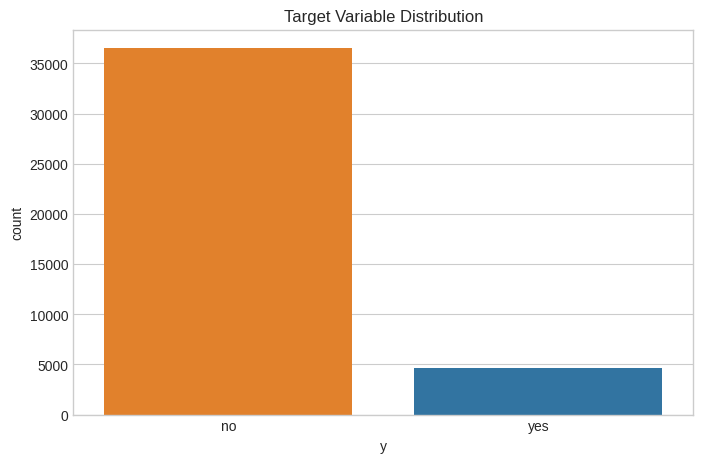


Analysis of Categorical Features:

JOB Distribution:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


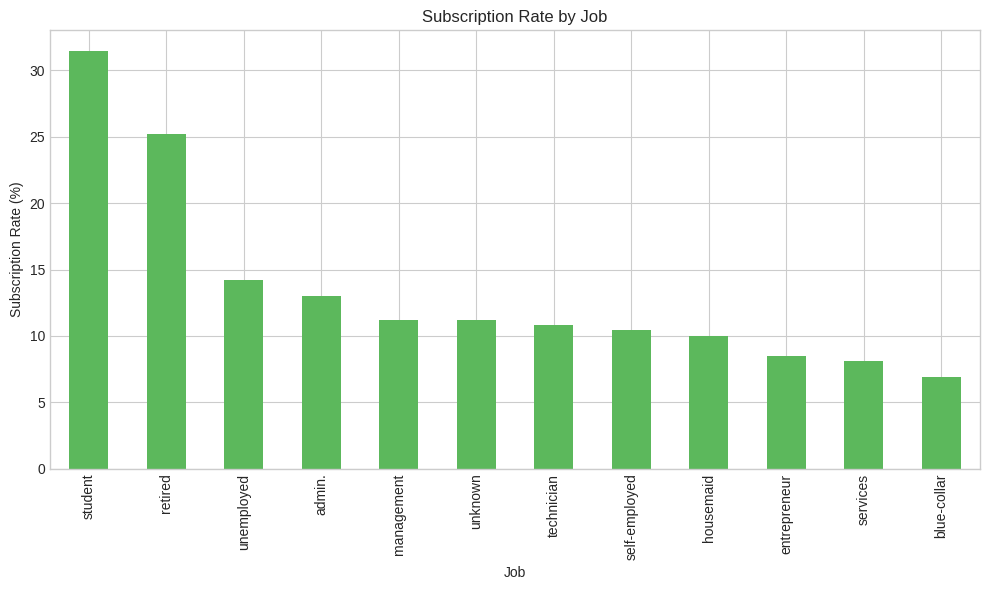


MARITAL Distribution:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


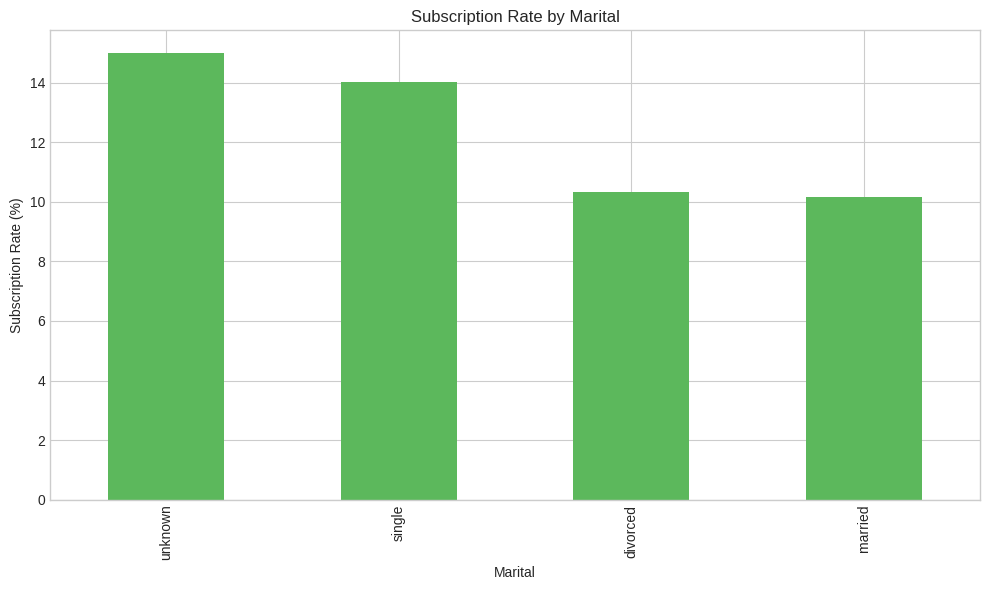


EDUCATION Distribution:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


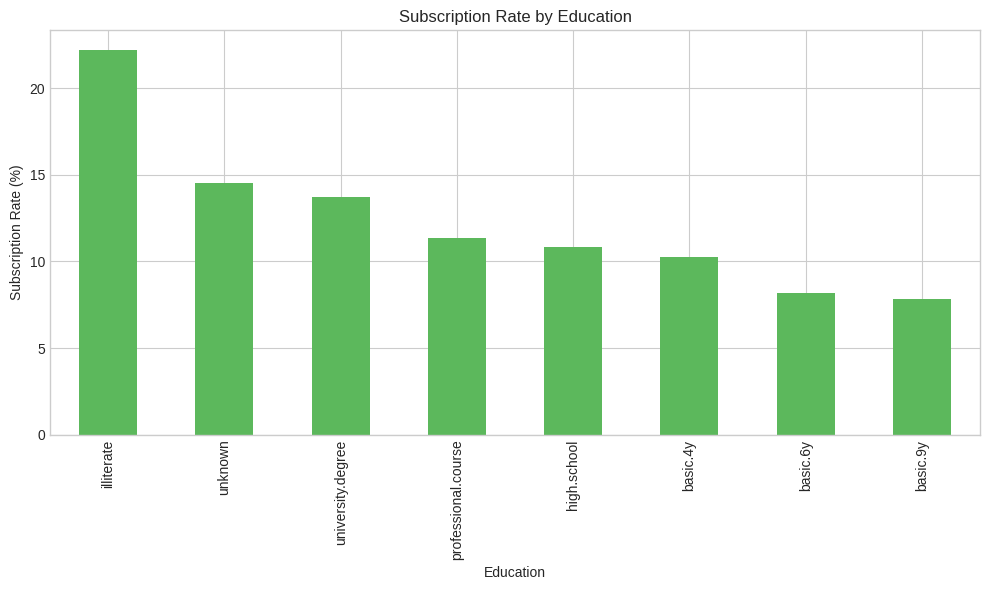


DEFAULT Distribution:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


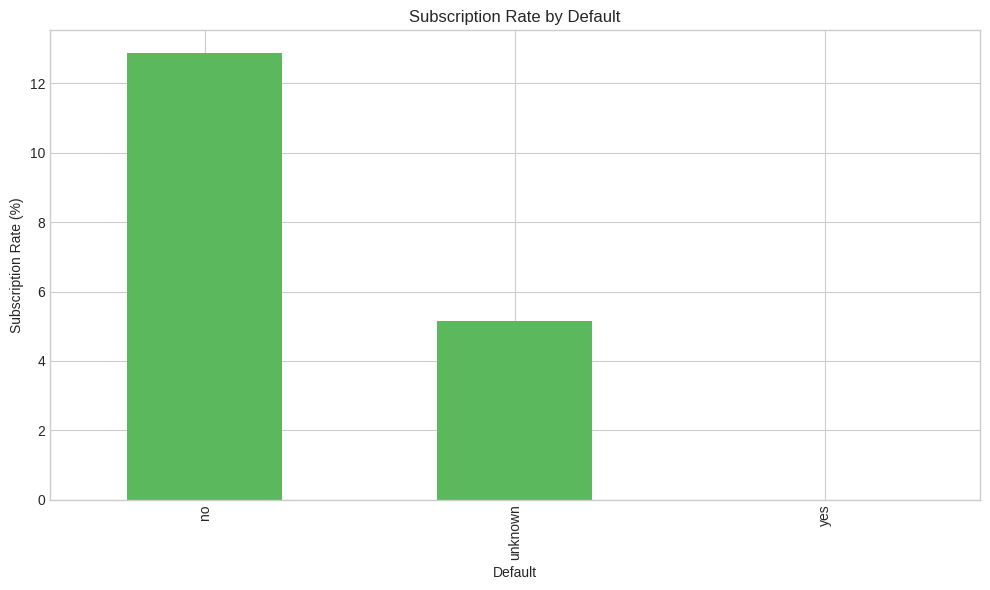


HOUSING Distribution:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64


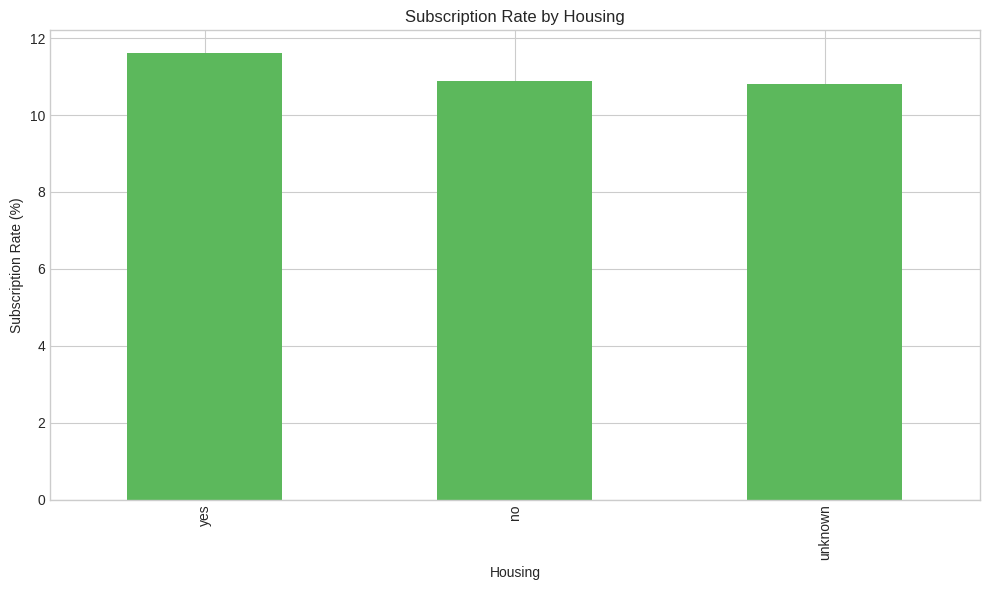


LOAN Distribution:
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64


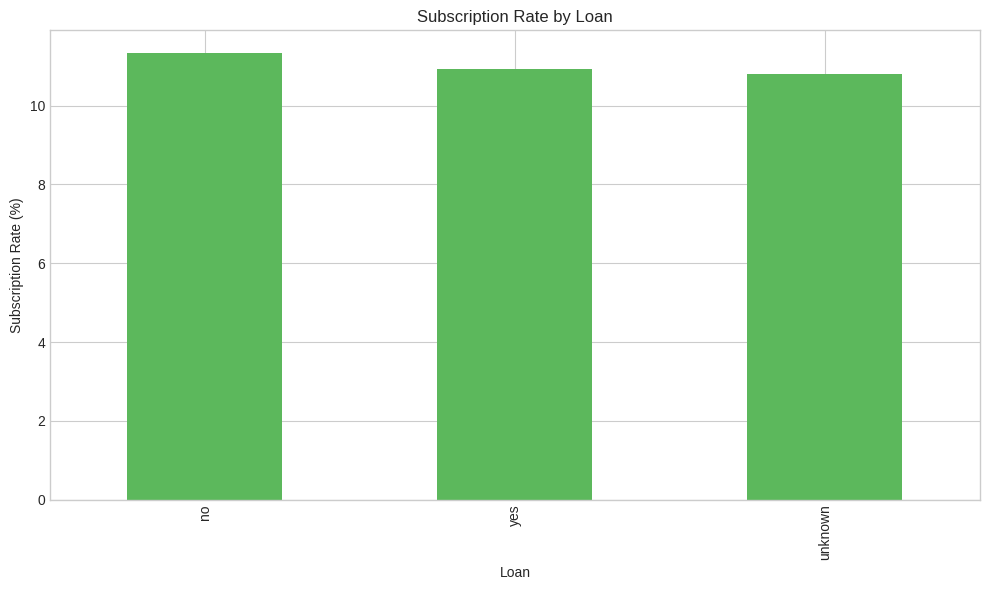


CONTACT Distribution:
contact
cellular     26144
telephone    15044
Name: count, dtype: int64


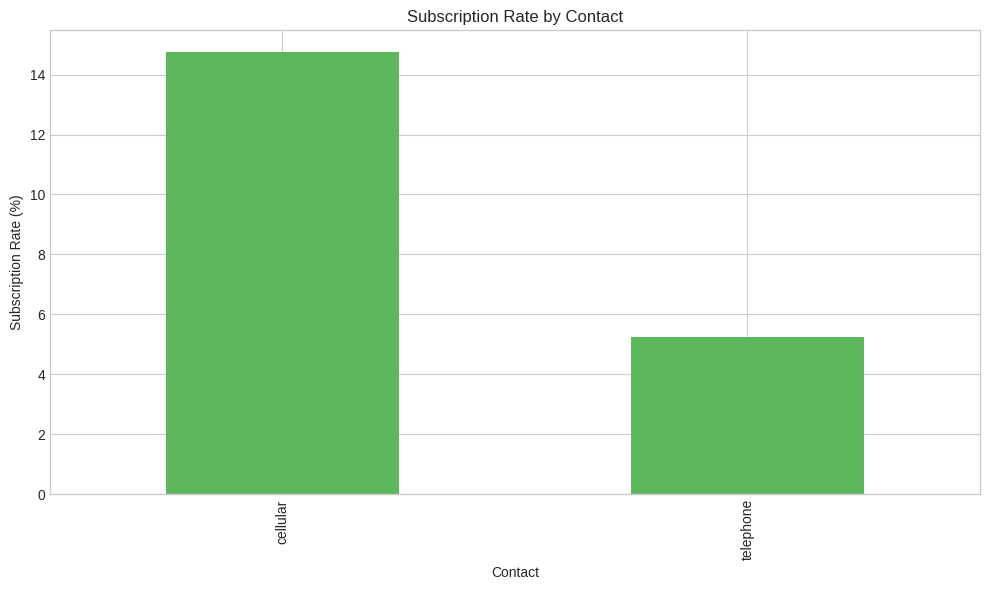


MONTH Distribution:
month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64


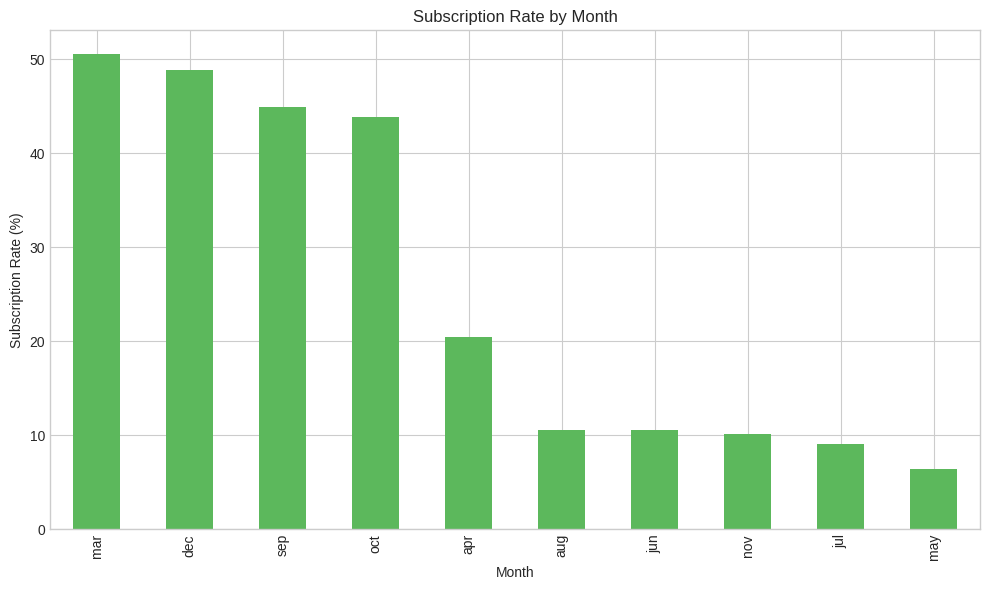


DAY_OF_WEEK Distribution:
day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64


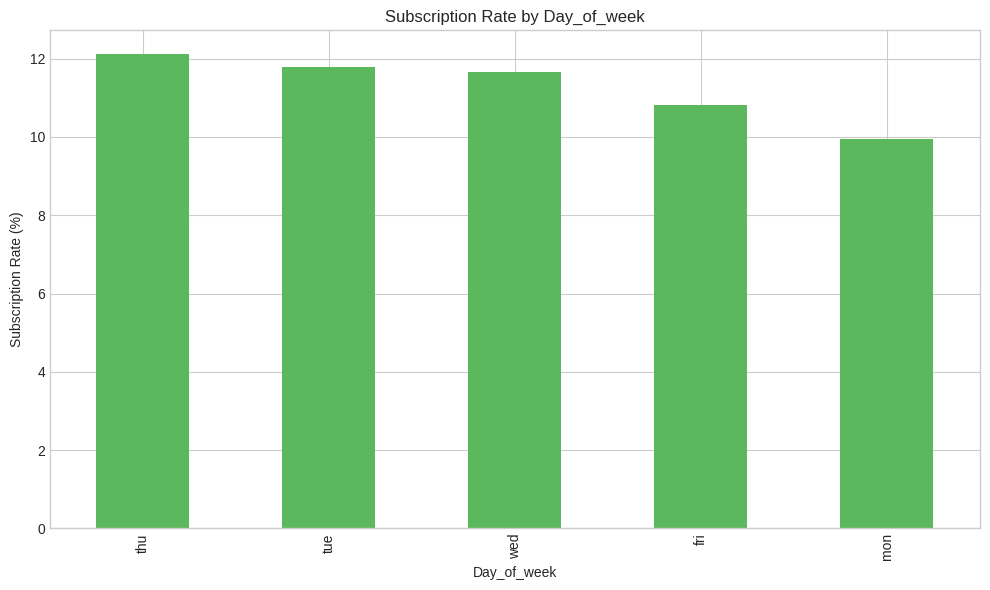


POUTCOME Distribution:
poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64


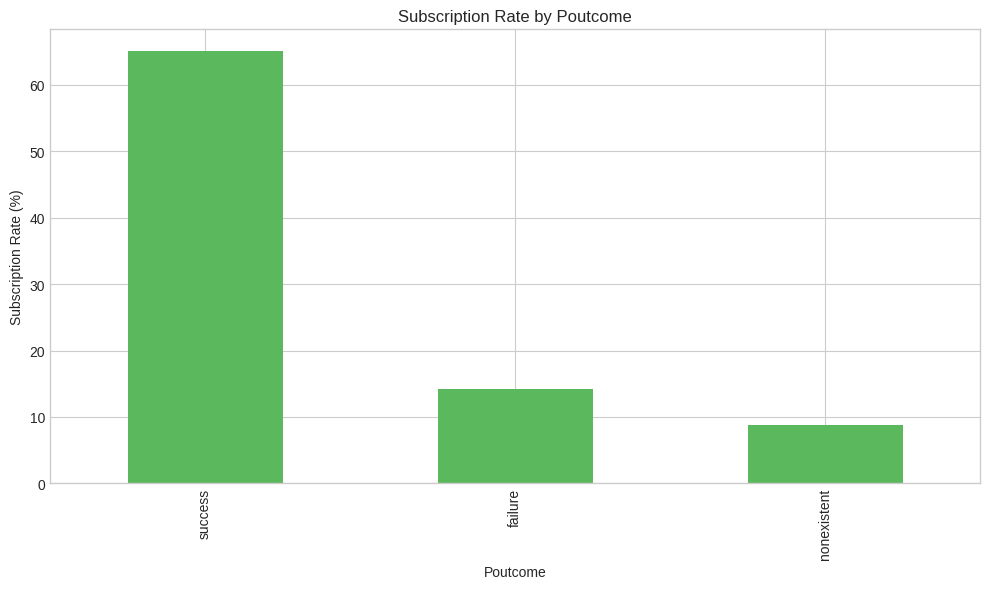


Correlation Analysis for Numerical Features:


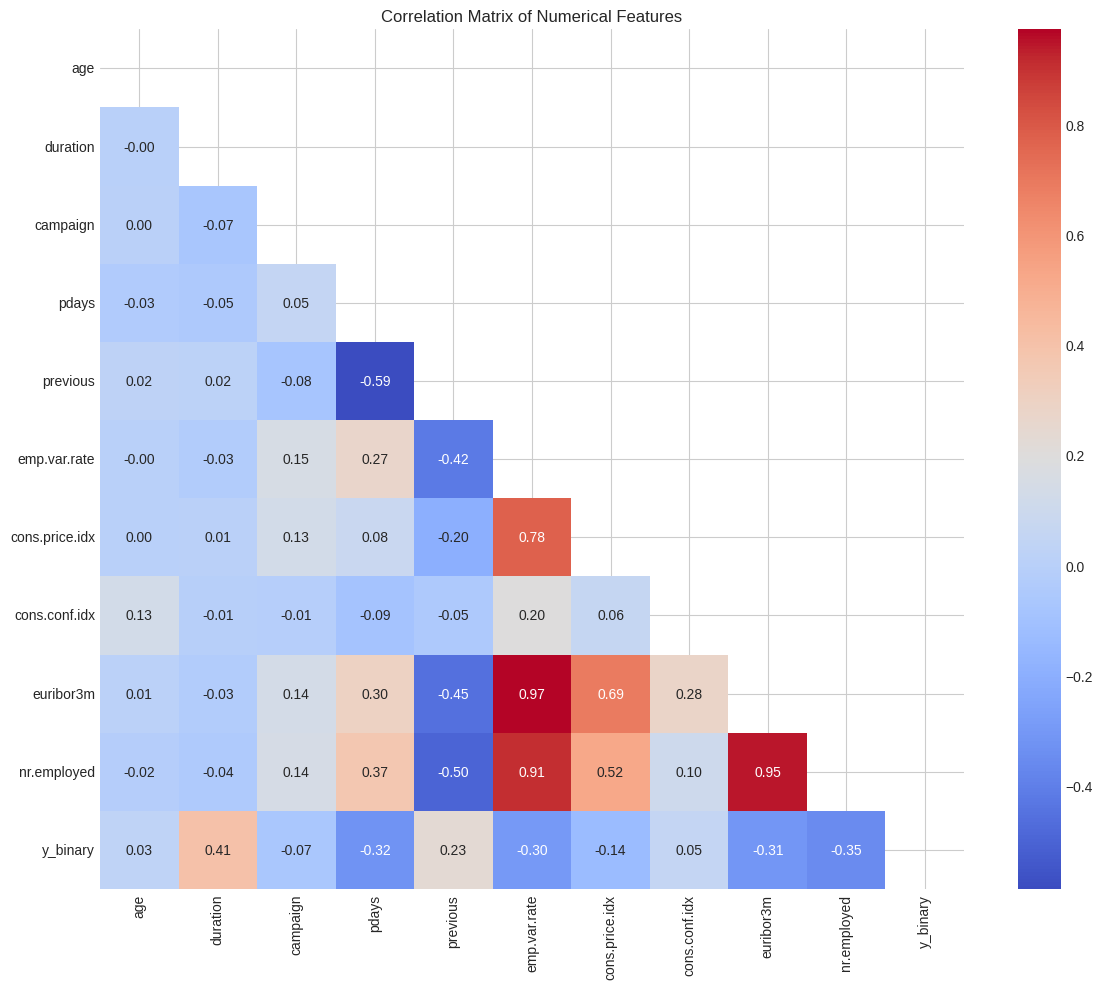

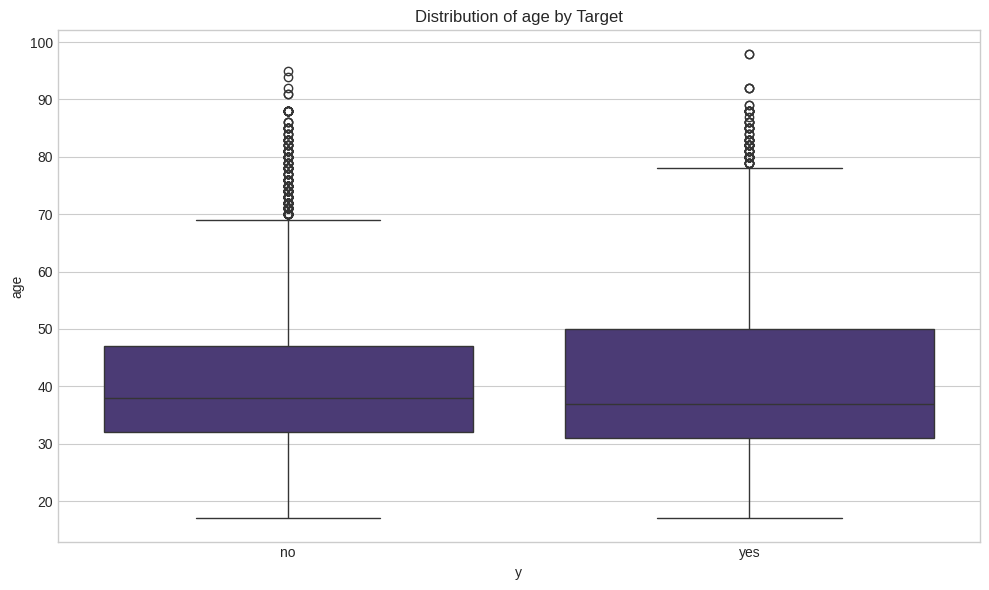

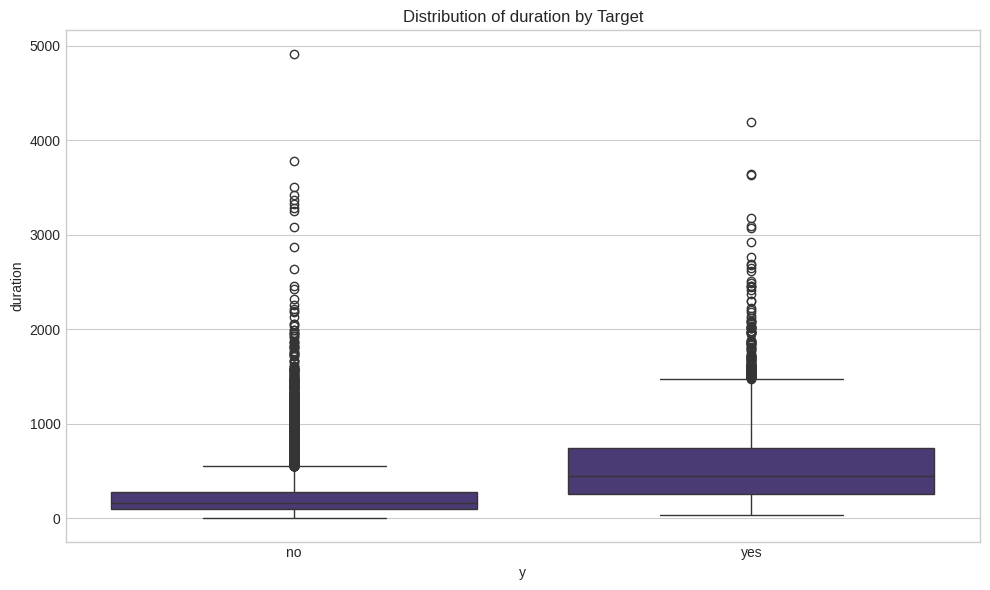

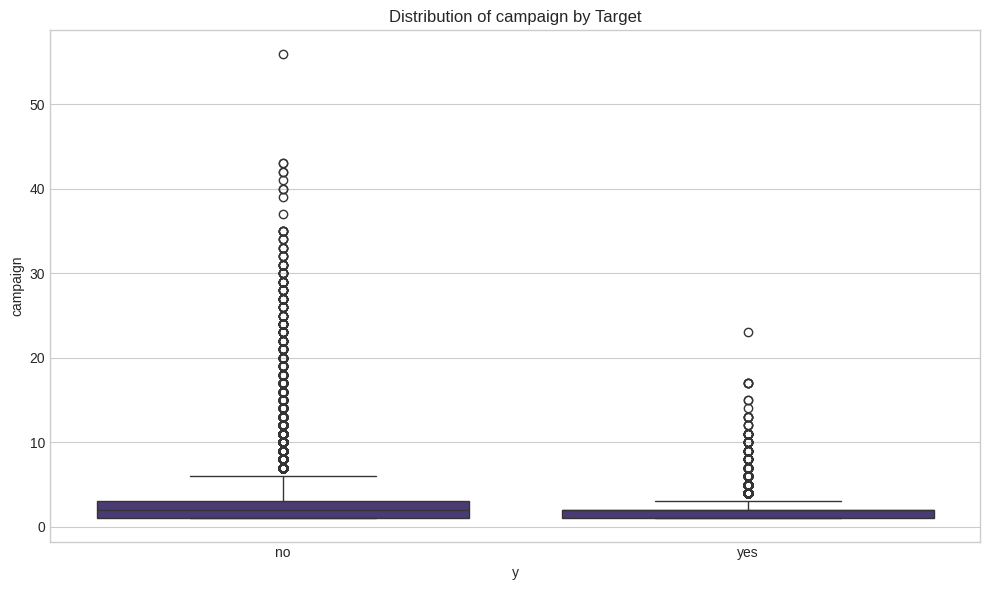

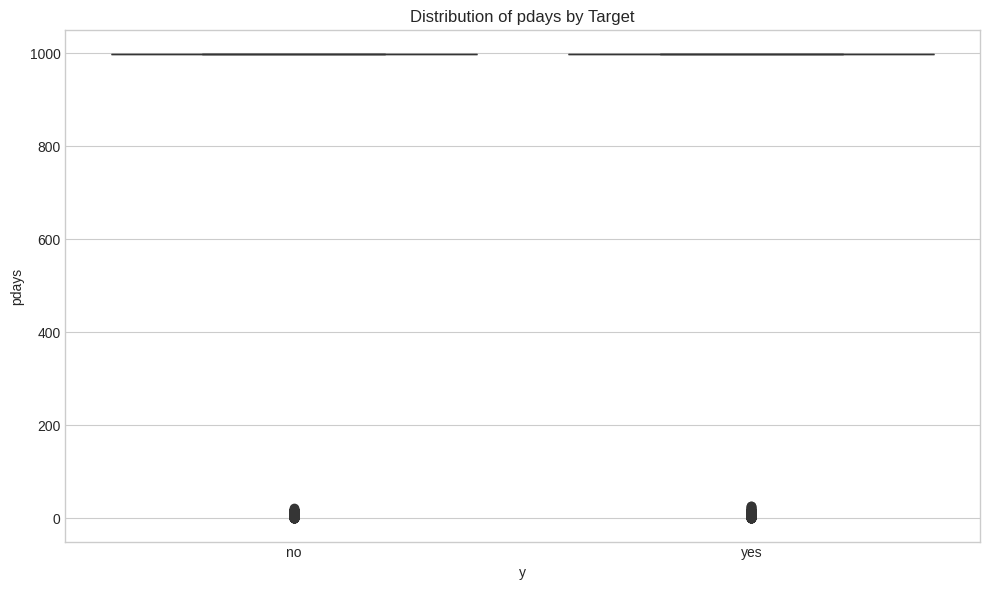

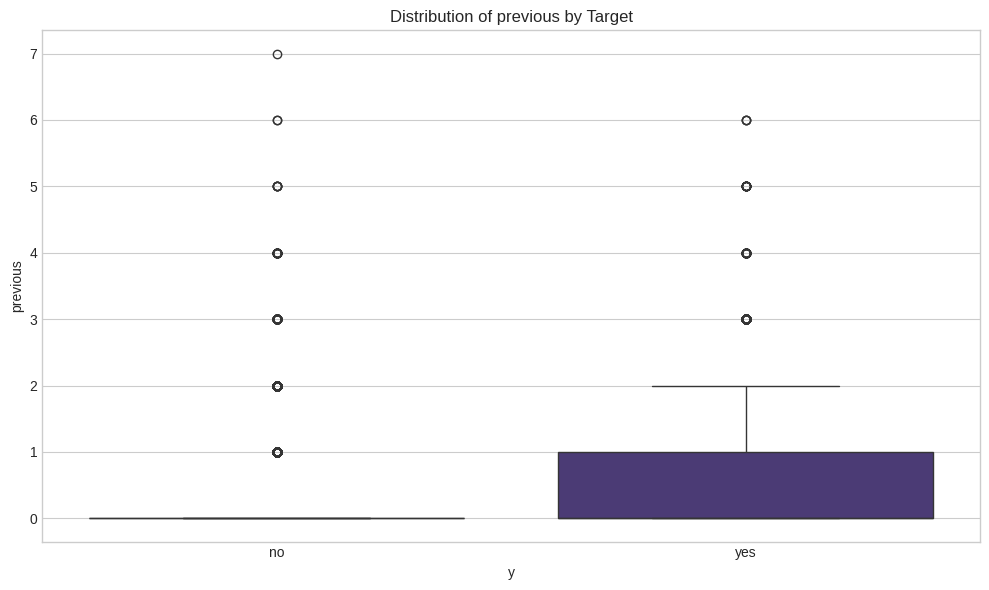

In [32]:
print("\n===== Q1: Exploratory Data Analysis =====")

# Basic information about the dataset
print("\nDataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check data types and missing values
print("\nData Types and Missing Values:")
print(df.info())

# Summary statistics
print("\nSummary Statistics for Numerical Features:")
print(df.describe())

# Check target variable distribution
print("\nTarget Variable Distribution:")
target_counts = df['y'].value_counts()
print(target_counts)
print(f"Target Variable Ratio (yes/no): {target_counts['yes']/target_counts['no']:.4f}")

# Visualize target distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=df, palette=['#ff7f0e', '#1f77b4'])
plt.title('Target Variable Distribution')
plt.show()
plt.savefig('target_distribution.png')
plt.close()

# Analyze categorical features
print("\nAnalysis of Categorical Features:")
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                'contact', 'month', 'day_of_week', 'poutcome']

for feature in cat_features:
    print(f"\n{feature.upper()} Distribution:")
    value_counts = df[feature].value_counts()
    print(value_counts)

    # Visualize the top categories with their subscription rates
    plt.figure(figsize=(10, 6))
    subscription_rate = df.groupby(feature)['y'].apply(lambda x: (x == 'yes').mean() * 100).sort_values(ascending=False)
    subscription_rate.plot(kind='bar', color='#5cb85c')
    plt.title(f'Subscription Rate by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Subscription Rate (%)')
    plt.tight_layout()
    plt.show()
    plt.savefig(f'{feature}_subscription_rate.png')
    plt.close()

# Correlation analysis for numerical features
print("\nCorrelation Analysis for Numerical Features:")
num_features = ['age', 'duration', 'campaign', 'pdays', 'previous',
                'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create a binary target variable for correlation analysis
df_temp = df.copy()
df_temp['y_binary'] = df_temp['y'].map({'yes': 1, 'no': 0})

# Calculate and visualize correlation matrix
plt.figure(figsize=(12, 10))
correlation = df_temp[num_features + ['y_binary']].corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()
plt.savefig('correlation_matrix.png')
plt.close()

# Analyze relationship between key numerical features and target
for feature in ['age', 'duration', 'campaign', 'pdays', 'previous']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='y', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Target')
    plt.tight_layout()
    plt.show()
    plt.savefig(f'{feature}_by_target.png')
    plt.close()



===== Q2: Data Preprocessing =====

a. Missing Value Analysis:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Unknown Values in Categorical Features:
job: 330 unknown values (0.80%)
marital: 80 unknown values (0.19%)
education: 1731 unknown values (4.20%)
default: 8597 unknown values (20.87%)
housing: 990 unknown values (2.40%)
loan: 990 unknown values (2.40%)
Replaced 'unknown' in job with 'admin.'
Replaced 'unknown' in marital with 'married'
Replaced 'unknown' in education with 'university.degree'
Replaced 'unknown' in default with 'no'
Replaced 'unknown' in housing with 'yes'
Replaced 'unknown' in loan

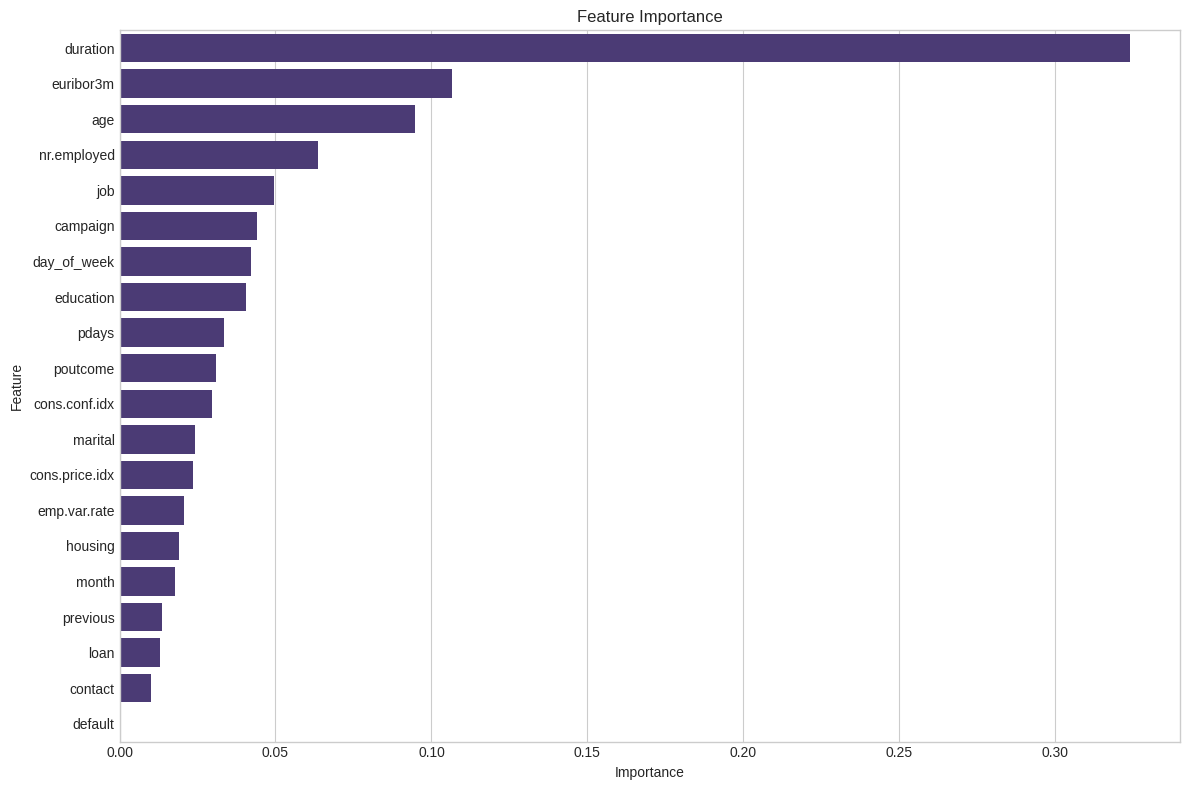


Selected 10 features with importance > 0.0302:
['duration', 'euribor3m', 'age', 'nr.employed', 'job', 'campaign', 'day_of_week', 'education', 'pdays', 'poutcome']

d. Handling Imbalanced Data with SMOTE:
Before SMOTE - Class distribution: Counter({0: 25583, 1: 3248})
After SMOTE - Class distribution: Counter({0: 25583, 1: 25583})

e. Standardizing Features:
Data has been standardized


In [33]:

# Q2. Data Preprocessing
print("\n===== Q2: Data Preprocessing =====")

# Make a copy of the dataframe for preprocessing
df_processed = df.copy()

# a. Missing Value Analysis
print("\na. Missing Value Analysis:")
print(df_processed.isnull().sum())

# Check for 'unknown' values in categorical features
print("\nUnknown Values in Categorical Features:")
for feature in cat_features:
    unknown_count = (df_processed[feature] == 'unknown').sum()
    if unknown_count > 0:
        print(f"{feature}: {unknown_count} unknown values ({unknown_count/len(df_processed)*100:.2f}%)")

# Replace 'unknown' with the most frequent value for each categorical feature
for feature in cat_features:
    if (df_processed[feature] == 'unknown').any():
        most_frequent = df_processed[feature].value_counts().index[0]
        if most_frequent != 'unknown':
            df_processed[feature] = df_processed[feature].replace('unknown', most_frequent)
            print(f"Replaced 'unknown' in {feature} with '{most_frequent}'")

# b. Label Encoding
print("\nb. Label Encoding:")
label_encoders = {}
for feature in cat_features:
    le = LabelEncoder()
    df_processed[feature] = le.fit_transform(df_processed[feature])
    label_encoders[feature] = le
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"{feature} mapping: {mapping}")

# Encode target variable
le_y = LabelEncoder()
df_processed['y'] = le_y.fit_transform(df_processed['y'])
print(f"Target mapping: {dict(zip(le_y.classes_, le_y.transform(le_y.classes_)))}")

# c. Feature Selection with Random Forest
print("\nc. Feature Importance based on Random Forest:")
# Fix: Remove y_binary from the dataset
X = df_processed.drop('y', axis=1)
y = df_processed['y']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a random forest for feature importance
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_train, y_train)

# Get feature importances
importances = rf_selector.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
plt.savefig('feature_importance.png')
plt.close()

# Select top features (keeping features with importance > median)
median_importance = feature_importance['Importance'].median()
selected_features = feature_importance[feature_importance['Importance'] > median_importance]['Feature'].tolist()
print(f"\nSelected {len(selected_features)} features with importance > {median_importance:.4f}:")
print(selected_features)

# Update X_train and X_test with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# d. Handle Imbalanced Data with SMOTE
print("\nd. Handling Imbalanced Data with SMOTE:")
print(f"Before SMOTE - Class distribution: {Counter(y_train)}")

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)

print(f"After SMOTE - Class distribution: {Counter(y_train_smote)}")

# e. Standardization
print("\ne. Standardizing Features:")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test_selected)

print("Data has been standardized")



===== Q3: Building Supervised Learning Models =====

a. Logistic Regression:

Logistic Regression Performance:
Accuracy: 0.8483
ROC AUC: 0.9186

Confusion Matrix:
[[9311 1654]
 [ 220 1172]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10965
           1       0.41      0.84      0.56      1392

    accuracy                           0.85     12357
   macro avg       0.70      0.85      0.73     12357
weighted avg       0.91      0.85      0.87     12357



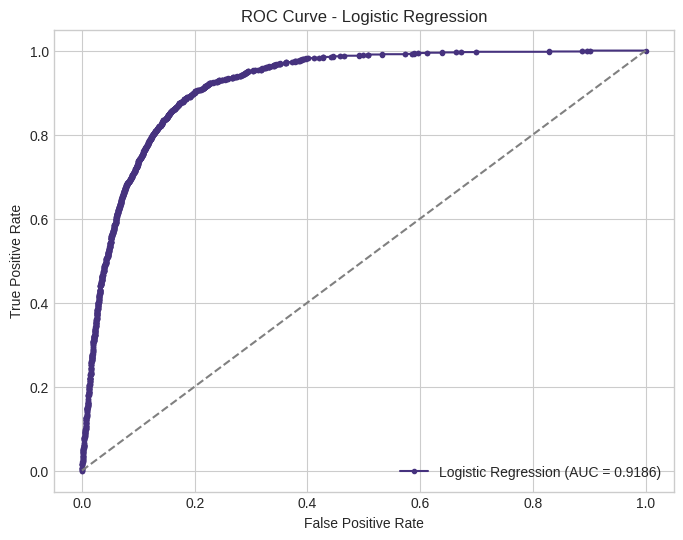


b. Decision Tree:

Decision Tree Performance:
Accuracy: 0.8826
ROC AUC: 0.7623

Confusion Matrix:
[[10061   904]
 [  547   845]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     10965
           1       0.48      0.61      0.54      1392

    accuracy                           0.88     12357
   macro avg       0.72      0.76      0.74     12357
weighted avg       0.90      0.88      0.89     12357



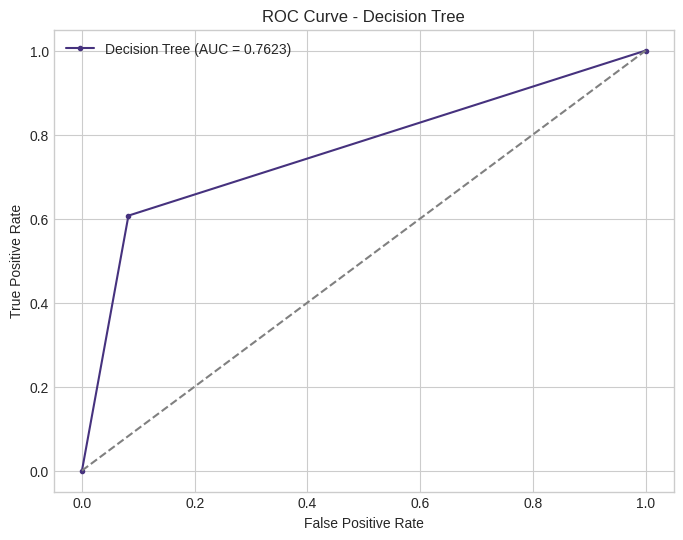


c. Random Forest:

Random Forest Performance:
Accuracy: 0.9031
ROC AUC: 0.9387

Confusion Matrix:
[[10153   812]
 [  385  1007]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     10965
           1       0.55      0.72      0.63      1392

    accuracy                           0.90     12357
   macro avg       0.76      0.82      0.79     12357
weighted avg       0.92      0.90      0.91     12357



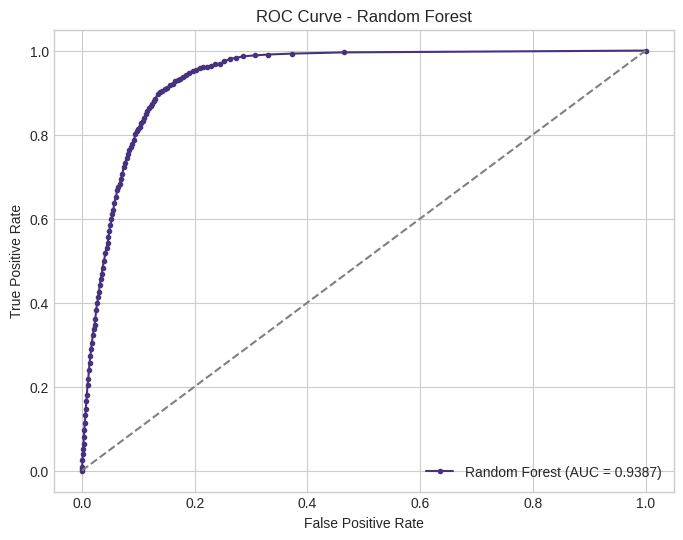


===== Q4: Model Tuning and Comparison =====

Model Performance Comparison:
                 Model  Accuracy       AUC
0  Logistic Regression  0.848345  0.918619
1        Decision Tree  0.882577  0.762298
2        Random Forest  0.903132  0.938672

Performing Hyperparameter Tuning:

Best Logistic Regression parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.01}

Tuned Logistic Regression Performance:
Accuracy: 0.8492
ROC AUC: 0.9192

Confusion Matrix:
[[9319 1646]
 [ 217 1175]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10965
           1       0.42      0.84      0.56      1392

    accuracy                           0.85     12357
   macro avg       0.70      0.85      0.73     12357
weighted avg       0.91      0.85      0.87     12357



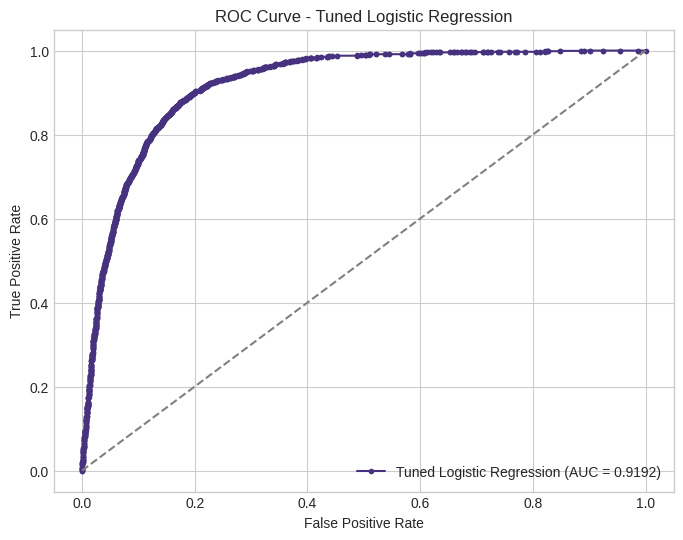


Best Decision Tree parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'gini'}

Tuned Decision Tree Performance:
Accuracy: 0.8857
ROC AUC: 0.8492

Confusion Matrix:
[[10121   844]
 [  569   823]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     10965
           1       0.49      0.59      0.54      1392

    accuracy                           0.89     12357
   macro avg       0.72      0.76      0.74     12357
weighted avg       0.90      0.89      0.89     12357



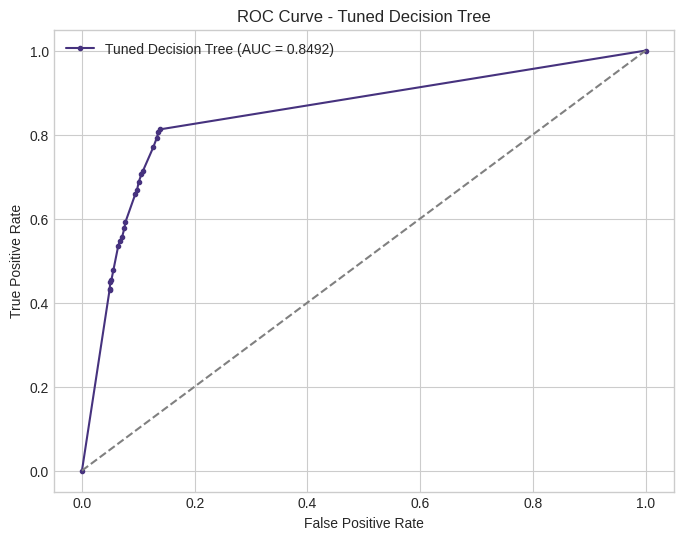


Best Random Forest parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}

Tuned Random Forest Performance:
Accuracy: 0.9046
ROC AUC: 0.9398

Confusion Matrix:
[[10187   778]
 [  401   991]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     10965
           1       0.56      0.71      0.63      1392

    accuracy                           0.90     12357
   macro avg       0.76      0.82      0.79     12357
weighted avg       0.92      0.90      0.91     12357



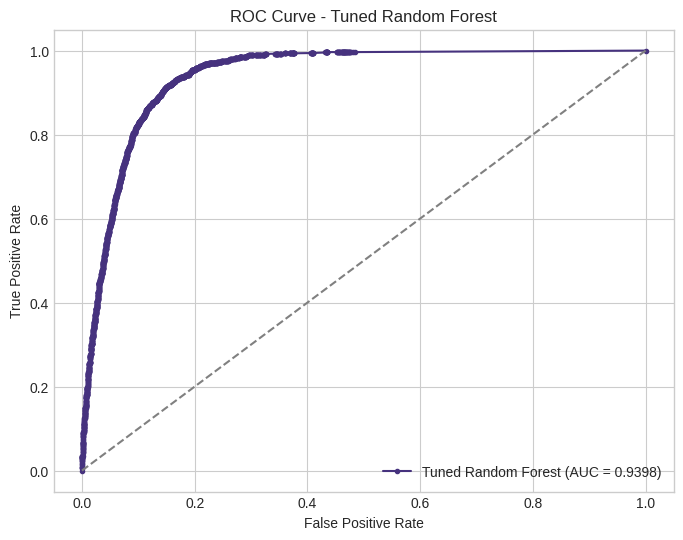


Tuned Model Performance Comparison:
                       Model  Accuracy       AUC
0  Tuned Logistic Regression  0.849235  0.919209
1        Tuned Decision Tree  0.885652  0.849178
2        Tuned Random Forest  0.904588  0.939808

Best Model: Tuned Random Forest
Best Model Accuracy: 0.9046
Best Model AUC: 0.9398

===== Conclusion =====
The Tuned Random Forest performs best in predicting if a client will subscribe to a term deposit.
The most important features for prediction are:
- duration: 0.3238
- euribor3m: 0.1065
- age: 0.0947
- nr.employed: 0.0635
- job: 0.0495


<Figure size 1000x600 with 0 Axes>

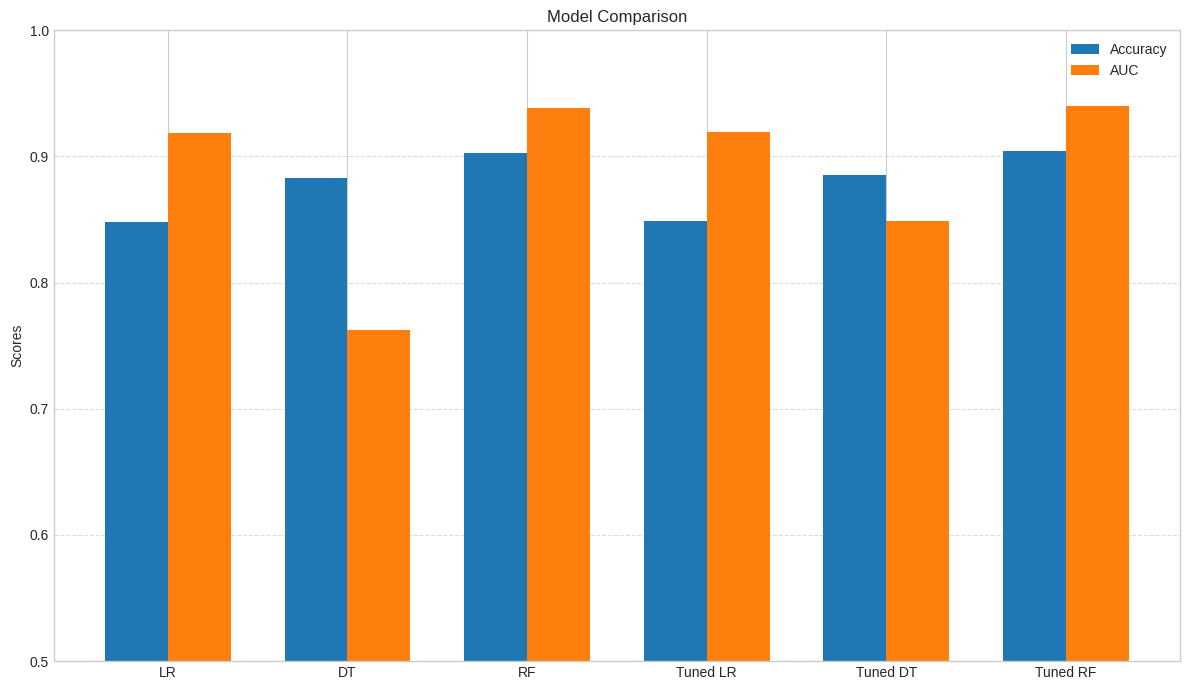


Analysis completed. Results and visualizations have been saved to the current directory.


In [34]:

# Q3. Build Supervised Learning Models
print("\n===== Q3: Building Supervised Learning Models =====")

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {auc:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.', label=f'{model_name} (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()
    plt.savefig(f'roc_curve_{model_name}.png')
    plt.close()

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'AUC': auc,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

# a. Logistic Regression
print("\na. Logistic Regression:")
lr_model = LogisticRegression(max_iter=2000, random_state=42)
lr_results = evaluate_model(lr_model, X_train_scaled, y_train_smote, X_test_scaled, y_test, "Logistic Regression")

# b. Decision Tree
print("\nb. Decision Tree:")
dt_model = DecisionTreeClassifier(random_state=42)
dt_results = evaluate_model(dt_model, X_train_scaled, y_train_smote, X_test_scaled, y_test, "Decision Tree")

# c. Random Forest
print("\nc. Random Forest:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_results = evaluate_model(rf_model, X_train_scaled, y_train_smote, X_test_scaled, y_test, "Random Forest")

# Q4. Model Tuning and Comparison
print("\n===== Q4: Model Tuning and Comparison =====")

# Create results table
results = pd.DataFrame([lr_results, dt_results, rf_results])
print("\nModel Performance Comparison:")
comparison_table = results[['Model', 'Accuracy', 'AUC']]
print(comparison_table)

# Model tuning
print("\nPerforming Hyperparameter Tuning:")

# Logistic Regression tuning
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
lr_search = RandomizedSearchCV(LogisticRegression(random_state=42, max_iter=2000),
                             lr_params, cv=5, n_iter=10, random_state=42, n_jobs=-1)
lr_search.fit(X_train_scaled, y_train_smote)
print("\nBest Logistic Regression parameters:", lr_search.best_params_)
lr_tuned = lr_search.best_estimator_
lr_tuned_results = evaluate_model(lr_tuned, X_train_scaled, y_train_smote, X_test_scaled, y_test, "Tuned Logistic Regression")

# Decision Tree tuning
dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}
dt_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                             dt_params, cv=5, n_iter=10, random_state=42, n_jobs=-1)
dt_search.fit(X_train_scaled, y_train_smote)
print("\nBest Decision Tree parameters:", dt_search.best_params_)
dt_tuned = dt_search.best_estimator_
dt_tuned_results = evaluate_model(dt_tuned, X_train_scaled, y_train_smote, X_test_scaled, y_test, "Tuned Decision Tree")

# Random Forest tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                             rf_params, cv=5, n_iter=10, random_state=42, n_jobs=-1)
rf_search.fit(X_train_scaled, y_train_smote)
print("\nBest Random Forest parameters:", rf_search.best_params_)
rf_tuned = rf_search.best_estimator_
rf_tuned_results = evaluate_model(rf_tuned, X_train_scaled, y_train_smote, X_test_scaled, y_test, "Tuned Random Forest")

# Final model comparison
tuned_results = pd.DataFrame([lr_tuned_results, dt_tuned_results, rf_tuned_results])
print("\nTuned Model Performance Comparison:")
tuned_comparison = tuned_results[['Model', 'Accuracy', 'AUC']]
print(tuned_comparison)

# Determine the best model
best_model_idx = tuned_results['AUC'].idxmax()
best_model = tuned_results.loc[best_model_idx, 'Model']
best_accuracy = tuned_results.loc[best_model_idx, 'Accuracy']
best_auc = tuned_results.loc[best_model_idx, 'AUC']

print(f"\nBest Model: {best_model}")
print(f"Best Model Accuracy: {best_accuracy:.4f}")
print(f"Best Model AUC: {best_auc:.4f}")

# Conclusion
print("\n===== Conclusion =====")
print(f"The {best_model} performs best in predicting if a client will subscribe to a term deposit.")
print("The most important features for prediction are:")
for feature, importance in feature_importance.head(5).values:
    print(f"- {feature}: {importance:.4f}")

# Create a final plot comparing all models
plt.figure(figsize=(10, 6))
models = ['LR', 'DT', 'RF', 'Tuned LR', 'Tuned DT', 'Tuned RF']
accuracies = [lr_results['Accuracy'], dt_results['Accuracy'], rf_results['Accuracy'],
              lr_tuned_results['Accuracy'], dt_tuned_results['Accuracy'], rf_tuned_results['Accuracy']]
aucs = [lr_results['AUC'], dt_results['AUC'], rf_results['AUC'],
        lr_tuned_results['AUC'], dt_tuned_results['AUC'], rf_tuned_results['AUC']]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x - width/2, accuracies, width, label='Accuracy', color='#1f77b4')
ax.bar(x + width/2, aucs, width, label='AUC', color='#ff7f0e')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig('model_comparison.png')
plt.close()

print("\nAnalysis completed. Results and visualizations have been saved to the current directory.")

I value your precious time. My master, Curseofwitcher, created me to assist people in finding and analyzing data. While I strive to be accurate, I may occasionally generate incorrect responses — I'm still learning and improving. If you spot any mistakes, please let me know, so I can grow smarter.

#💡 Stay hydrated, stay blessed. 💫